In [473]:
from google.colab import drive

drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [474]:
file_path = './drive/MyDrive/LGAImers/'

In [495]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics

In [476]:
warnings.filterwarnings('ignore')

In [477]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [478]:
train_df = pd.read_csv(file_path + './train.csv')

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

test_x = pd.read_csv(file_path + './test.csv').drop(columns=['ID'])

수치의 격차가 없거나 크지 않은 feature는 제외했다. X_02, X_04, X_05, X_10, X_11, X_23, X_47, X_48

X_46 결과값이 나오지 않는 이유는 무엇일까?

In [479]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [480]:
outlier_iqr(train_x,'X_01')

data_X1 = train_x[(train_x['X_01'] < upper) & (train_x['X_01'] > lower)]
len(data_X1)

IQR은 3.0589999999999975 이다.
lower bound 값은 61.87650000000001 이다.
upper bound 값은 74.1125 이다.
총 이상치 개수는 1145 이다.


38462

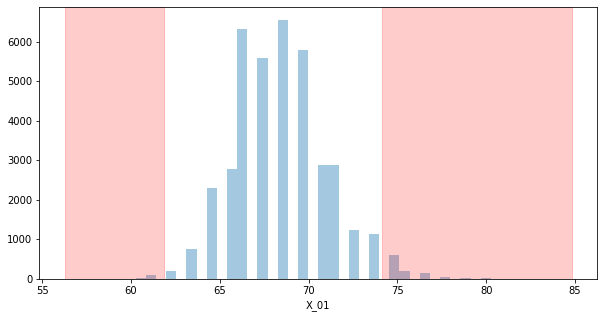

In [481]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_01, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_01.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_01.max(), alpha=0.2, color='red')

In [504]:
X_01 = data_X1['X_01']

print(type(X_01))
X_01.head()

<class 'pandas.core.series.Series'>


0        70.544
1        69.524
2        72.583
3        71.563
4        69.524
          ...  
39602    66.465
39603    66.465
39604    68.504
39605    66.465
39606    66.465
Name: X_01, Length: 38462, dtype: float64

In [337]:
outlier_iqr(train_x,'X_03')

data_X3 = train_x[(train_x['X_03'] < upper) & (train_x['X_03'] > lower)]
len(data_X3)

IQR은 6.700000000000003 이다.
lower bound 값은 55.01999999999999 이다.
upper bound 값은 81.82 이다.
총 이상치 개수는 699 이다.


38908

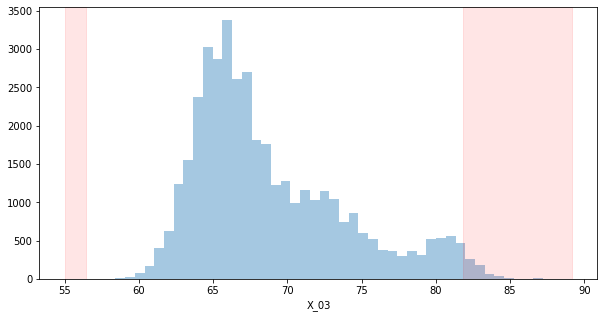

In [338]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_03, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_03.min(), alpha=0.1, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_03.max(), alpha=0.1, color='red')

In [508]:
X_03 = data_X3['X_03']

<class 'pandas.core.series.Series'>


0    67.47
1    65.17
2    64.07
3    67.57
4    63.57
Name: X_03, dtype: float64

In [339]:
outlier_iqr(train_x,'X_06')

data_X6 = train_x[(train_x['X_06'] < upper) & (train_x['X_06'] > lower)]
len(data_X6)

IQR은 3.0589999999999975 이다.
lower bound 값은 64.27550000000001 이다.
upper bound 값은 76.5115 이다.
총 이상치 개수는 419 이다.


39188

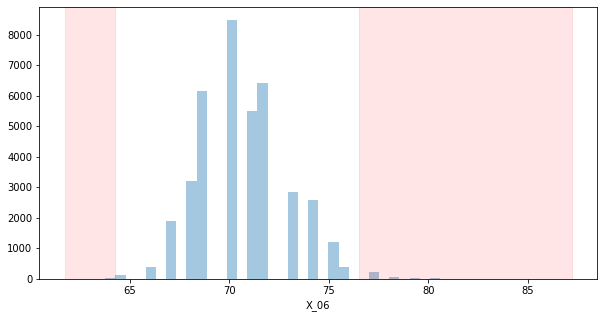

In [340]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_06, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_06.min(), alpha=0.1, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_06.max(), alpha=0.1, color='red')

In [513]:
X_06 = data_X6['X_06']

In [341]:
outlier_iqr(train_x,'X_07')

data_X7 = train_x[(train_x['X_07'] < upper) & (train_x['X_07'] > lower)]
len(data_X7)

IQR은 1.9800000000000004 이다.
lower bound 값은 24.92 이다.
upper bound 값은 32.84 이다.
총 이상치 개수는 2052 이다.


37548

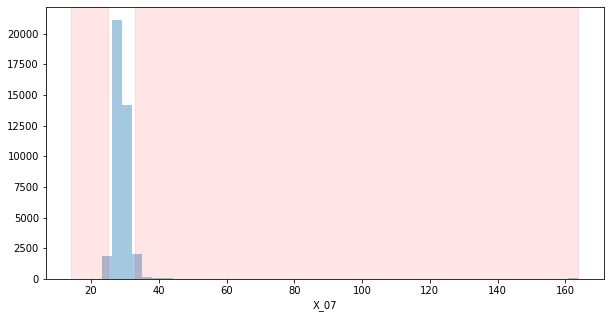

In [342]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_07, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_07.min(), alpha=0.1, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_07.max(), alpha=0.1, color='red')

In [514]:
X_07 = data_X7['X_07']

In [343]:
outlier_iqr(train_x,'X_08')

data_X8 = train_x[(train_x['X_08'] < upper) & (train_x['X_08'] > lower)]
len(data_X8)

IQR은 26.63000000000001 이다.
lower bound 값은 66.04499999999999 이다.
upper bound 값은 172.56500000000003 이다.
총 이상치 개수는 8193 이다.


31414

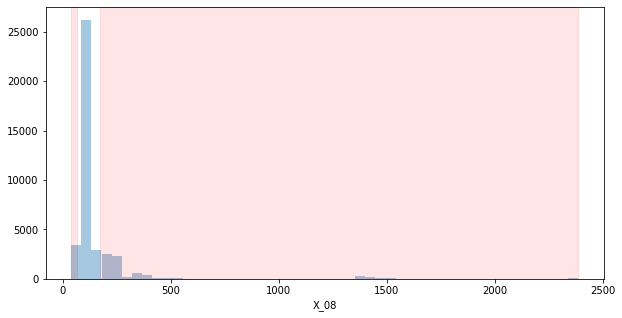

In [344]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_08, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_08.min(), alpha=0.1, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_08.max(), alpha=0.1, color='red')

In [515]:
X_08 = data_X8['X_08']

In [345]:
outlier_iqr(train_x,'X_09')

data_X9 = train_x[(train_x['X_09'] < upper) & (train_x['X_09'] > lower)]
len(data_X9)

IQR은 75.41999999999999 이다.
lower bound 값은 75.41000000000001 이다.
upper bound 값은 377.09 이다.
총 이상치 개수는 1400 이다.


38207

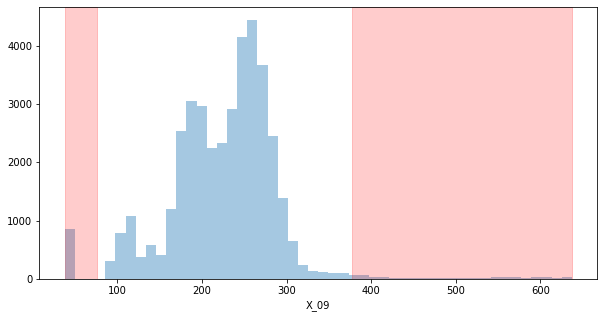

In [346]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_09, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_09.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_09.max(), alpha=0.2, color='red')

In [516]:
X_09 = data_X9['X_09']

In [347]:
outlier_iqr(train_x,'X_12')

data_X12 = train_x[(train_x['X_12'] < upper) & (train_x['X_12'] > lower)]
len(data_X12)

IQR은 0.02999999999999936 이다.
lower bound 값은 4.315000000000001 이다.
upper bound 값은 4.434999999999999 이다.
총 이상치 개수는 315 이다.


39292

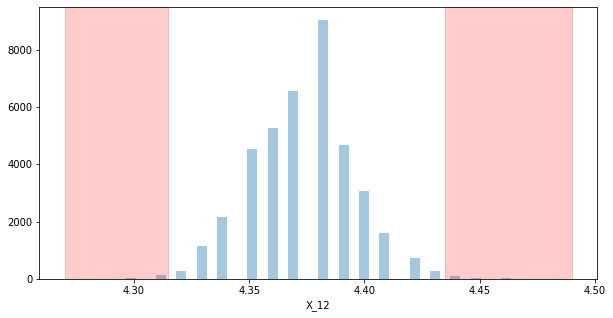

In [348]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_12, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_12.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_12.max(), alpha=0.2, color='red')

In [518]:
X_12 = data_X12['X_12']

In [349]:
outlier_iqr(train_x,'X_13')

data_X13 = train_x[(train_x['X_13'] < upper) & (train_x['X_13'] > lower)]
len(data_X13)

IQR은 0.03 이다.
lower bound 값은 0.085 이다.
upper bound 값은 0.20500000000000002 이다.
총 이상치 개수는 820 이다.


38787

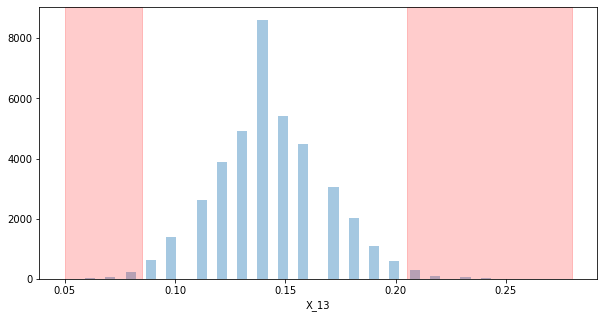

In [350]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_13, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_13.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_13.max(), alpha=0.2, color='red')

In [519]:
X_13 = data_X13['X_13']

In [351]:
outlier_iqr(train_x,'X_14')

data_X14 = train_x[(train_x['X_14'] < upper) & (train_x['X_14'] > lower)]
len(data_X14)

IQR은 0.040000000000000924 이다.
lower bound 값은 13.29 이다.
upper bound 값은 13.450000000000003 이다.
총 이상치 개수는 282 이다.


39143

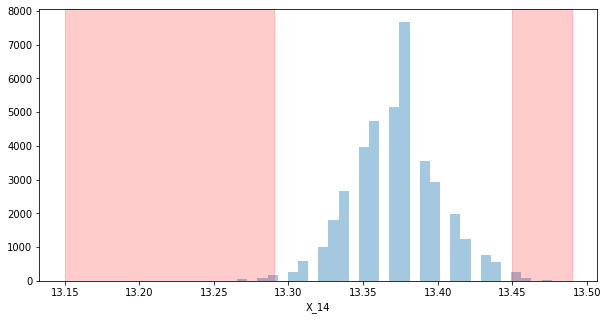

In [352]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_14, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_14.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_14.max(), alpha=0.2, color='red')

In [520]:
X_14 = data_X14['X_14']

In [353]:
outlier_iqr(train_x,'X_15')

data_X15 = train_x[(train_x['X_15'] < upper) & (train_x['X_15'] > lower)]
len(data_X15)

IQR은 0.05000000000000071 이다.
lower bound 값은 13.284999999999998 이다.
upper bound 값은 13.485000000000001 이다.
총 이상치 개수는 60 이다.


39547

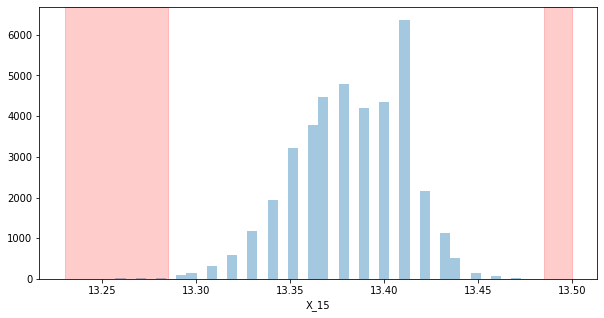

In [354]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_15, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_15.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_15.max(), alpha=0.2, color='red')

In [521]:
X_15 = data_X15['X_15']

In [355]:
outlier_iqr(train_x,'X_16')

data_X16 = train_x[(train_x['X_16'] < upper) & (train_x['X_16'] > lower)]
len(data_X16)

IQR은 0.05000000000000071 이다.
lower bound 값은 13.364999999999998 이다.
upper bound 값은 13.565000000000001 이다.
총 이상치 개수는 257 이다.


39350

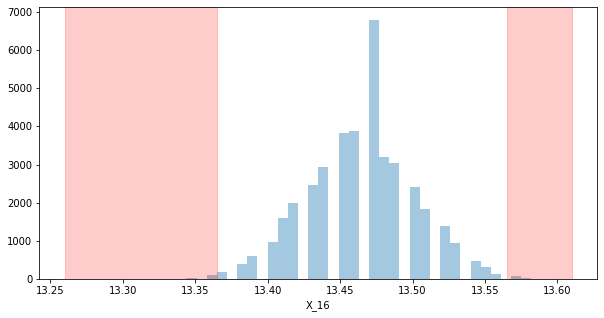

In [356]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_16, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_16.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_16.max(), alpha=0.2, color='red')

In [524]:
X_16 = data_X16['X_16']

In [357]:
outlier_iqr(train_x,'X_17')

data_X17 = train_x[(train_x['X_17'] < upper) & (train_x['X_17'] > lower)]
len(data_X17)

IQR은 0.02999999999999936 이다.
lower bound 값은 13.455000000000002 이다.
upper bound 값은 13.575 이다.
총 이상치 개수는 513 이다.


39094

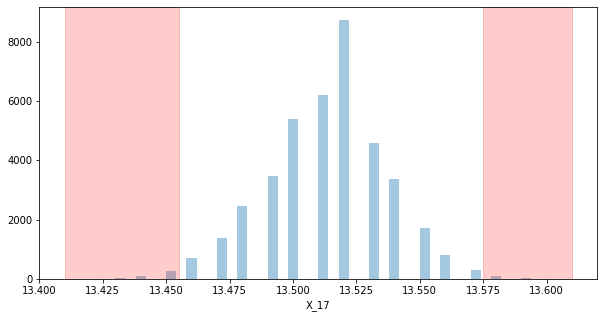

In [358]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_17, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_17.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_17.max(), alpha=0.2, color='red')

In [523]:
X_17 = data_X17['X_17']

In [359]:
outlier_iqr(train_x,'X_18')

data_X18 = train_x[(train_x['X_18'] < upper) & (train_x['X_18'] > lower)]
len(data_X18)

IQR은 0.040000000000000924 이다.
lower bound 값은 13.369999999999997 이다.
upper bound 값은 13.530000000000001 이다.
총 이상치 개수는 247 이다.


39360

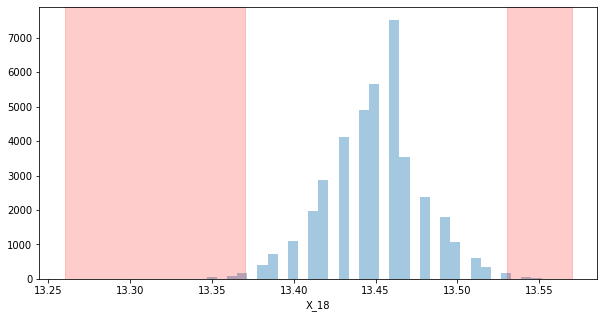

In [360]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_18, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_18.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_18.max(), alpha=0.2, color='red')

In [522]:
X_18 = data_X18['X_18']

In [361]:
outlier_iqr(train_x,'X_19')

data_X19 = train_x[(train_x['X_19'] < upper) & (train_x['X_19'] > lower)]
len(data_X19)

IQR은 0.1499999999999999 이다.
lower bound 값은 2.9350000000000005 이다.
upper bound 값은 3.535 이다.
총 이상치 개수는 152 이다.


39455

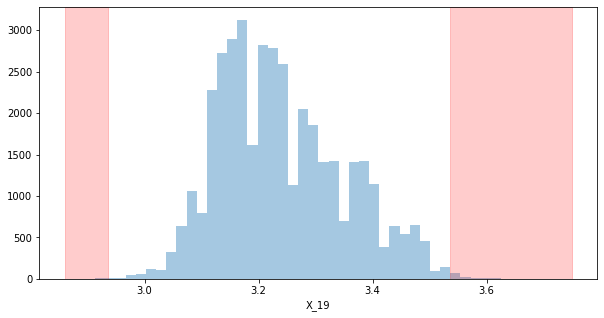

In [362]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_19, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_19.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_19.max(), alpha=0.2, color='red')

In [525]:
X_19 = data_X19['X_19']

In [363]:
outlier_iqr(train_x,'X_20')

data_X20 = train_x[(train_x['X_20'] < upper) & (train_x['X_20'] > lower)]
len(data_X20)

IQR은 0.16999999999999993 이다.
lower bound 값은 2.845 이다.
upper bound 값은 3.525 이다.
총 이상치 개수는 18 이다.


39589

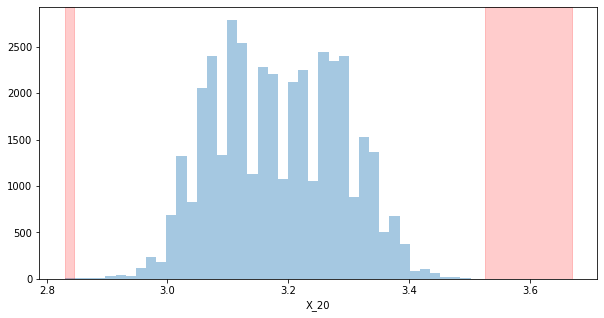

In [364]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_20, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_20.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_20.max(), alpha=0.2, color='red')

In [526]:
X_20 = data_X20['X_20']

In [365]:
outlier_iqr(train_x,'X_21')

data_X21 = train_x[(train_x['X_21'] < upper) & (train_x['X_21'] > lower)]
len(data_X21)

IQR은 0.16000000000000014 이다.
lower bound 값은 2.8499999999999996 이다.
upper bound 값은 3.49 이다.
총 이상치 개수는 61 이다.


39526

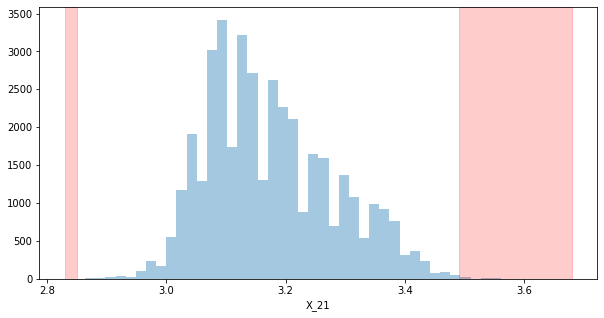

In [366]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_21, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_21.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_21.max(), alpha=0.2, color='red')

In [528]:
X_21 = data_X21['X_21']

In [367]:
outlier_iqr(train_x,'X_22')

data_X22 = train_x[(train_x['X_22'] < upper) & (train_x['X_22'] > lower)]
len(data_X22)

IQR은 0.17999999999999972 이다.
lower bound 값은 2.8700000000000006 이다.
upper bound 값은 3.5899999999999994 이다.
총 이상치 개수는 20 이다.


39587

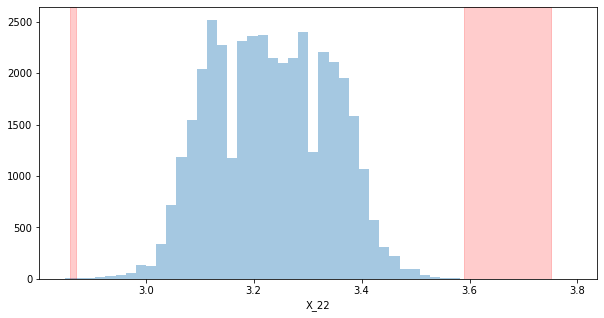

In [368]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_22, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_19.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_19.max(), alpha=0.2, color='red')

In [530]:
X_22 = data_X22['X_22']

In [369]:
outlier_iqr(train_x,'X_24')

data_X24 = train_x[(train_x['X_24'] < upper) & (train_x['X_24'] > lower)]
len(data_X24)

IQR은 0.050000000000000266 이다.
lower bound 값은 2.0149999999999997 이다.
upper bound 값은 2.2150000000000007 이다.
총 이상치 개수는 64 이다.


39543

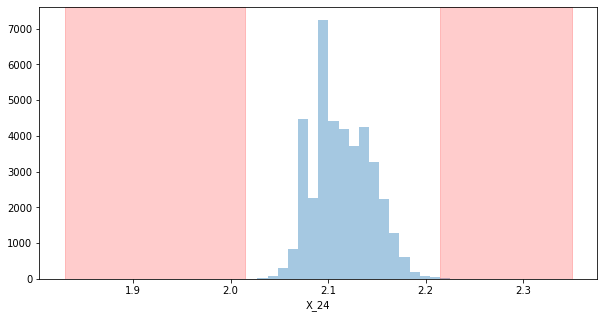

In [370]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_24, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_24.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_24.max(), alpha=0.2, color='red')

In [531]:
X_24 = data_X24['X_24']

In [371]:
outlier_iqr(train_x,'X_25')

data_X25 = train_x[(train_x['X_25'] < upper) & (train_x['X_25'] > lower)]
len(data_X25)

IQR은 0.050000000000000266 이다.
lower bound 값은 1.9949999999999994 이다.
upper bound 값은 2.1950000000000003 이다.
총 이상치 개수는 135 이다.


39472

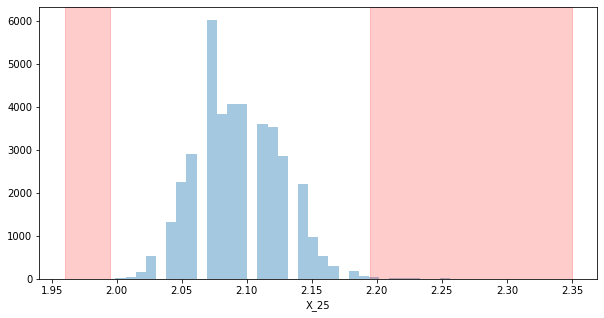

In [372]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_25, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_25.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_25.max(), alpha=0.2, color='red')

In [532]:
X_25 = data_X25['X_25']

In [373]:
outlier_iqr(train_x,'X_26')

data_X26 = train_x[(train_x['X_26'] < upper) & (train_x['X_26'] > lower)]
len(data_X26)

IQR은 0.06000000000000005 이다.
lower bound 값은 1.97 이다.
upper bound 값은 2.21 이다.
총 이상치 개수는 229 이다.


39348

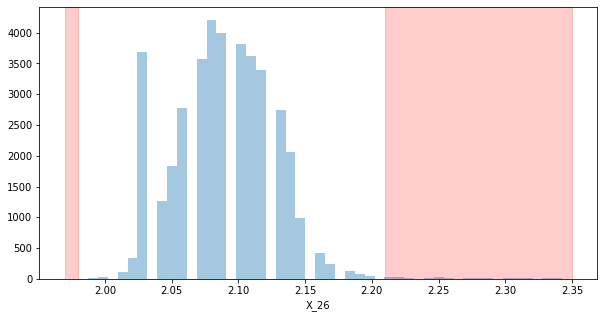

In [374]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_26, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_26.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_26.max(), alpha=0.2, color='red')

In [533]:
X_26 = data_X26['X_26']

In [375]:
outlier_iqr(train_x,'X_27')

data_X27 = train_x[(train_x['X_27'] < upper) & (train_x['X_27'] > lower)]
len(data_X27)

IQR은 0.050000000000000266 이다.
lower bound 값은 1.9949999999999994 이다.
upper bound 값은 2.1950000000000003 이다.
총 이상치 개수는 589 이다.


39018

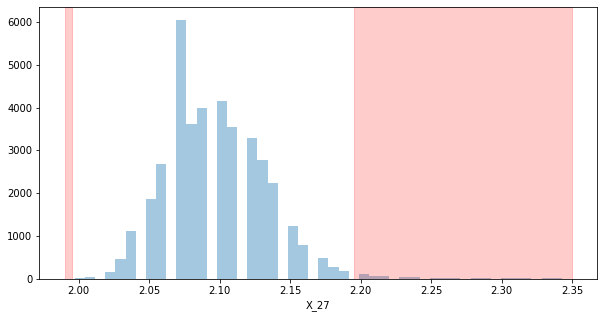

In [376]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_27, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_27.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_27.max(), alpha=0.2, color='red')

In [534]:
X_27 = data_X27['X_27']

In [377]:
outlier_iqr(train_x,'X_28')

data_X28 = train_x[(train_x['X_28'] < upper) & (train_x['X_28'] > lower)]
len(data_X28)

IQR은 0.050000000000000266 이다.
lower bound 값은 2.0149999999999997 이다.
upper bound 값은 2.2150000000000007 이다.
총 이상치 개수는 1034 이다.


38573

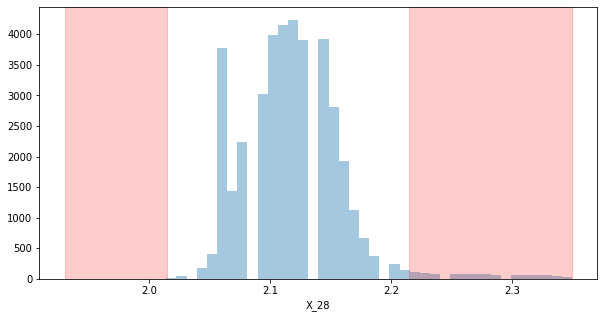

In [378]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_28, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_28.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_28.max(), alpha=0.2, color='red')

In [535]:
X_28 = data_X28['X_28']

In [379]:
outlier_iqr(train_x,'X_29')

data_X29 = train_x[(train_x['X_29'] < upper) & (train_x['X_29'] > lower)]
len(data_X29)

IQR은 0.06000000000000005 이다.
lower bound 값은 2.05 이다.
upper bound 값은 2.29 이다.
총 이상치 개수는 1168 이다.


38225

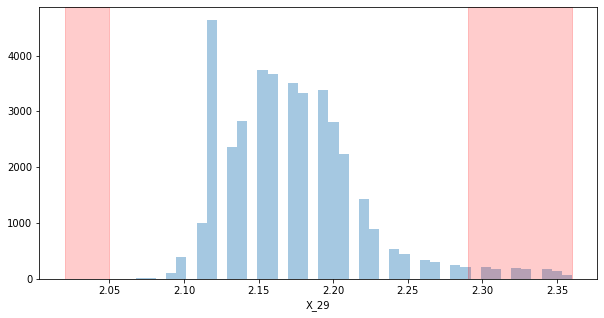

In [380]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_29, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_29.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_29.max(), alpha=0.2, color='red')

In [536]:
X_29 = data_X29['X_29']

In [381]:
outlier_iqr(train_x,'X_30')

data_X30 = train_x[(train_x['X_30'] < upper) & (train_x['X_20'] > lower)]
len(data_X30)

IQR은 0.009999999999999787 이다.
lower bound 값은 1.3550000000000004 이다.
upper bound 값은 1.3949999999999996 이다.
총 이상치 개수는 5926 이다.


36017

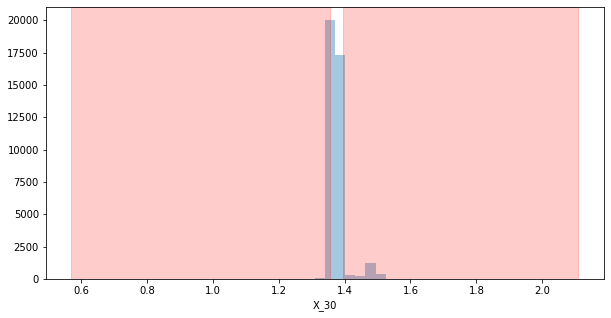

In [382]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_30, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_30.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_30.max(), alpha=0.2, color='red')

In [537]:
X_30 = data_X30['X_30']

In [383]:
outlier_iqr(train_x,'X_31')

data_X31 = train_x[(train_x['X_31'] < upper) & (train_x['X_31'] > lower)]
len(data_X31)

IQR은 0.07000000000000006 이다.
lower bound 값은 1.4249999999999998 이다.
upper bound 값은 1.705 이다.
총 이상치 개수는 1848 이다.


37759

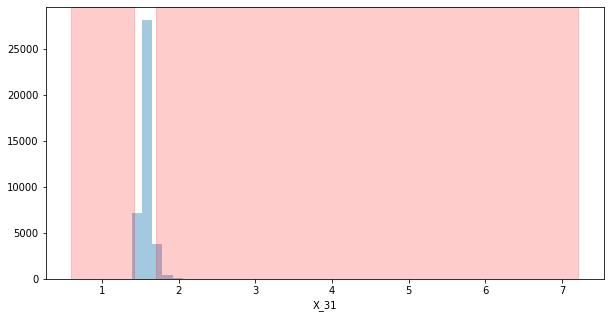

In [384]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_31, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_31.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_31.max(), alpha=0.2, color='red')

In [538]:
X_31 = data_X31['X_31']

In [385]:
outlier_iqr(train_x,'X_32')

data_X32 = train_x[(train_x['X_32'] < upper) & (train_x['X_32'] > lower)]
len(data_X32)

IQR은 0.020000000000000018 이다.
lower bound 값은 1.32 이다.
upper bound 값은 1.4000000000000001 이다.
총 이상치 개수는 1862 이다.


37698

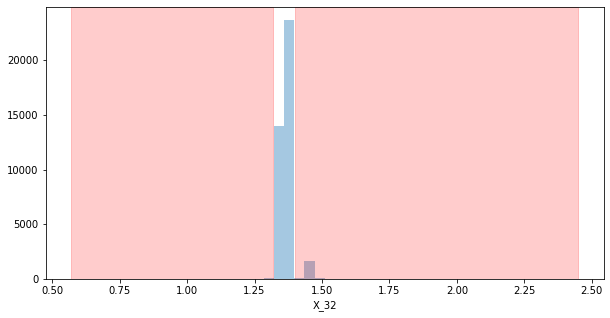

In [386]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_32, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_32.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_32.max(), alpha=0.2, color='red')

In [539]:
X_32 = data_X32['X_32']

In [387]:
outlier_iqr(train_x,'X_33')

data_X33 = train_x[(train_x['X_33'] < upper) & (train_x['X_33'] > lower)]
len(data_X33)

IQR은 0.06000000000000005 이다.
lower bound 값은 1.46 이다.
upper bound 값은 1.7000000000000002 이다.
총 이상치 개수는 3942 이다.


35665

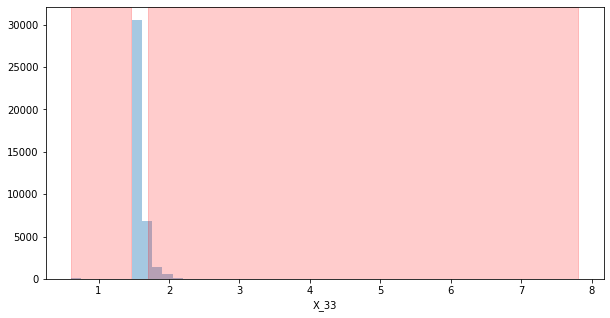

In [388]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_33, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_33.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_33.max(), alpha=0.2, color='red')

In [540]:
X_33 = data_X33['X_33']

In [389]:
outlier_iqr(train_x,'X_34')

data_X34 = train_x[(train_x['X_34'] < upper) & (train_x['X_34'] > lower)]
len(data_X34)

IQR은 0.07000000000000028 이다.
lower bound 값은 12.815 이다.
upper bound 값은 13.095 이다.
총 이상치 개수는 0 이다.


39607

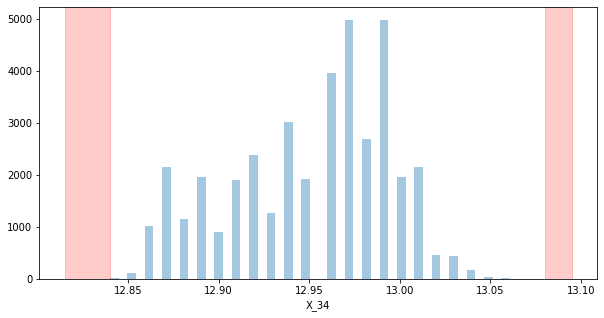

In [390]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_34, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_34.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_34.max(), alpha=0.2, color='red')

In [541]:
X_34 = data_X34['X_34']

In [391]:
outlier_iqr(train_x,'X_35')

data_X35 = train_x[(train_x['X_35'] < upper) & (train_x['X_35'] > lower)]
len(data_X35)

IQR은 0.10000000000000142 이다.
lower bound 값은 12.719999999999997 이다.
upper bound 값은 13.120000000000003 이다.
총 이상치 개수는 0 이다.


39607

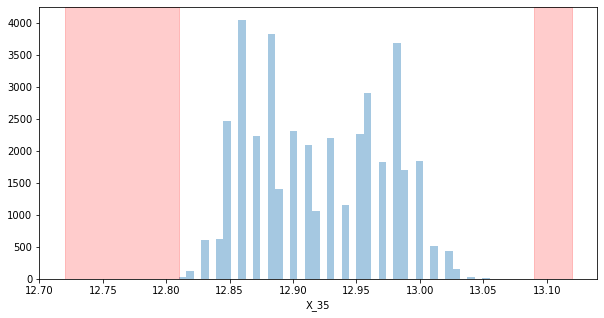

In [392]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_35, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_35.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_35.max(), alpha=0.2, color='red')

In [542]:
X_35 = data_X35['X_35']

In [393]:
outlier_iqr(train_x,'X_36')

data_X36 = train_x[(train_x['X_36'] < upper) & (train_x['X_36'] > lower)]
len(data_X36)

IQR은 0.08000000000000007 이다.
lower bound 값은 12.780000000000001 이다.
upper bound 값은 13.100000000000001 이다.
총 이상치 개수는 0 이다.


39607

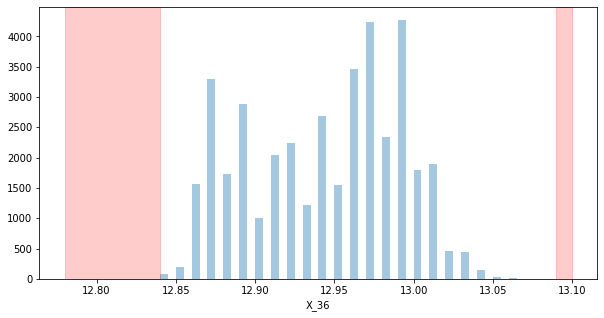

In [394]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_36, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_36.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_36.max(), alpha=0.2, color='red')

In [543]:
X_36 = data_X36['X_36']

In [395]:
outlier_iqr(train_x,'X_37')

data_X37 = train_x[(train_x['X_37'] < upper) & (train_x['X_37'] > lower)]
len(data_X37)

IQR은 0.10000000000000142 이다.
lower bound 값은 12.719999999999997 이다.
upper bound 값은 13.120000000000003 이다.
총 이상치 개수는 0 이다.


39607

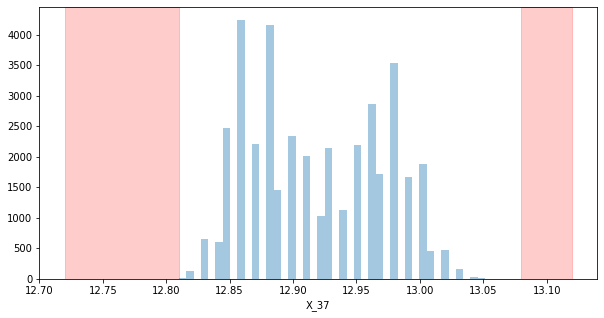

In [396]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_37, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_37.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_37.max(), alpha=0.2, color='red')

In [544]:
X_37 = data_X37['X_37']

In [397]:
outlier_iqr(train_x,'X_38')

data_X38 = train_x[(train_x['X_38'] < upper) & (train_x['X_38'] > lower)]
len(data_X38)

IQR은 0.41000000000000014 이다.
lower bound 값은 -16.775 이다.
upper bound 값은 -15.135 이다.
총 이상치 개수는 1524 이다.


38083

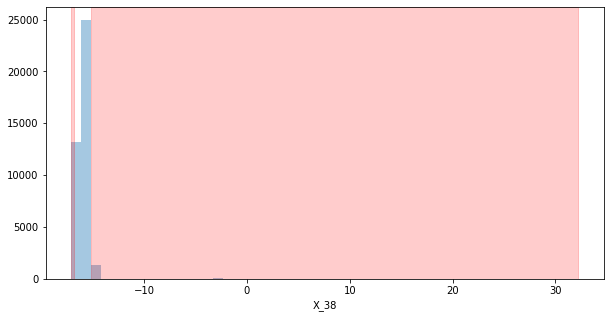

In [398]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_38, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_38.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_38.max(), alpha=0.2, color='red')

In [545]:
X_38 = data_X38['X_38']

In [399]:
outlier_iqr(train_x,'X_39')

data_X39 = train_x[(train_x['X_39'] < upper) & (train_x['X_39'] > lower)]
len(data_X39)

IQR은 0.41000000000000014 이다.
lower bound 값은 -16.775 이다.
upper bound 값은 -15.135 이다.
총 이상치 개수는 1499 이다.


38108

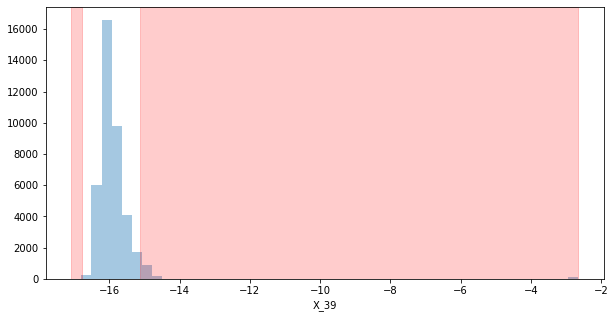

In [400]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_39, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_39.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_39.max(), alpha=0.2, color='red')

In [546]:
X_39 = data_X39['X_39']

In [401]:
outlier_iqr(train_x,'X_40')

data_X40 = train_x[(train_x['X_40'] < upper) & (train_x['X_40'] > lower)]
len(data_X40)

IQR은 0.41000000000000014 이다.
lower bound 값은 -17.424999999999997 이다.
upper bound 값은 -15.784999999999998 이다.
총 이상치 개수는 1449 이다.


38158

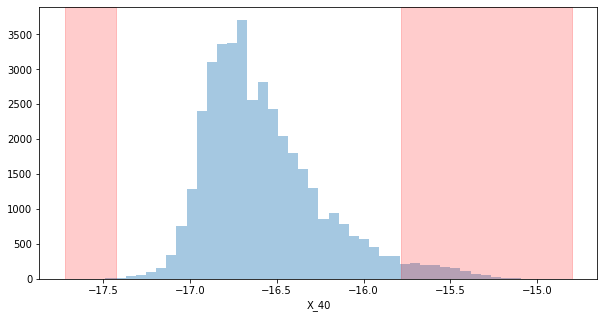

In [402]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_40, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_40.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_40.max(), alpha=0.2, color='red')

In [547]:
X_40 = data_X40['X_40']

In [403]:
outlier_iqr(train_x,'X_41')

data_X41 = train_x[(train_x['X_41'] < upper) & (train_x['X_41'] > lower)]
len(data_X41)

IQR은 0.03999999999999915 이다.
lower bound 값은 21.110000000000003 이다.
upper bound 값은 21.27 이다.
총 이상치 개수는 550 이다.


38918

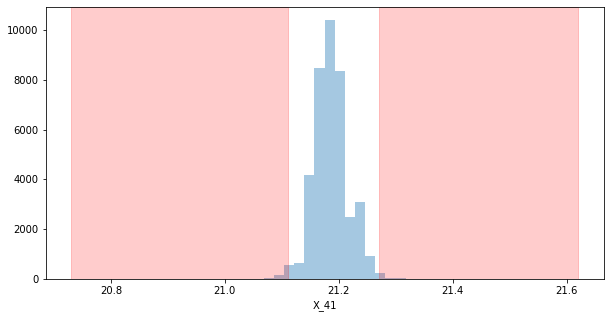

In [404]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_41, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_41.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_41.max(), alpha=0.2, color='red')

In [548]:
X_41 = data_X41['X_41']

In [405]:
outlier_iqr(train_x,'X_42')

data_X42 = train_x[(train_x['X_42'] < upper) & (train_x['X_42'] > lower)]
len(data_X42)

IQR은 0.05999999999999872 이다.
lower bound 값은 20.940000000000005 이다.
upper bound 값은 21.18 이다.
총 이상치 개수는 209 이다.


39351

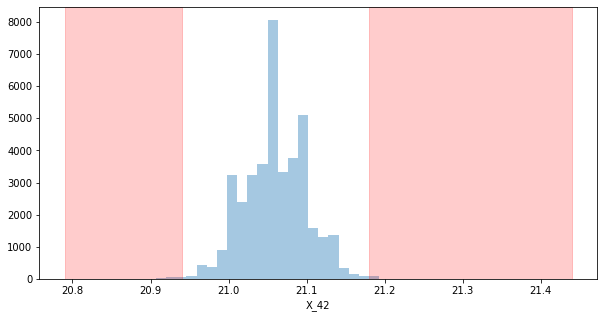

In [406]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_42, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_42.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_42.max(), alpha=0.2, color='red')

In [549]:
X_42 = data_X42['X_42']

In [407]:
outlier_iqr(train_x,'X_43')

data_X43 = train_x[(train_x['X_43'] < upper) & (train_x['X_43'] > lower)]
len(data_X43)

IQR은 0.06999999999999673 이다.
lower bound 값은 21.065000000000005 이다.
upper bound 값은 21.34499999999999 이다.
총 이상치 개수는 246 이다.


39361

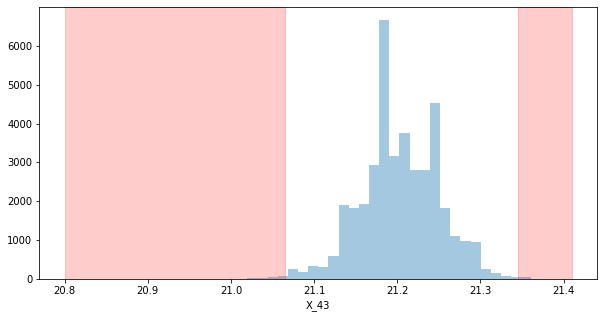

In [408]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_43, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_43.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_43.max(), alpha=0.2, color='red')

In [550]:
X_43 = data_X43['X_43']

In [409]:
outlier_iqr(train_x,'X_44')

data_X44 = train_x[(train_x['X_44'] < upper) & (train_x['X_44'] > lower)]
len(data_X44)

IQR은 0.060000000000002274 이다.
lower bound 값은 21.039999999999996 이다.
upper bound 값은 21.280000000000005 이다.
총 이상치 개수는 255 이다.


39352

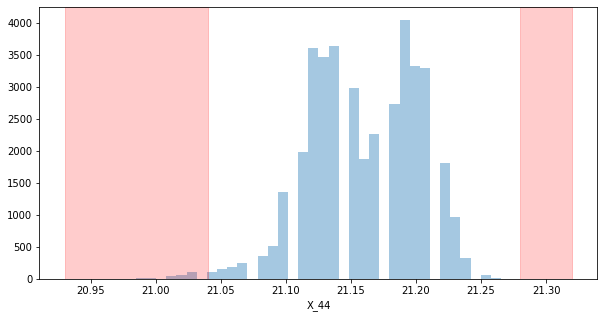

In [410]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_44, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_44.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_44.max(), alpha=0.2, color='red')

In [551]:
X_44 = data_X44['X_44']

In [411]:
outlier_iqr(train_x,'X_45')

data_X45 = train_x[(train_x['X_45'] < upper) & (train_x['X_45'] > lower)]
len(data_X45)

IQR은 0.07 이다.
lower bound 값은 0.014999999999999986 이다.
upper bound 값은 0.29500000000000004 이다.
총 이상치 개수는 59 이다.


39548

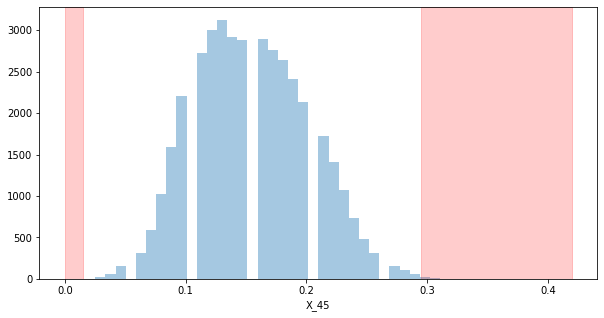

In [412]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_45, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_45.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_45.max(), alpha=0.2, color='red')

In [552]:
X_45 = data_X45['X_45']

In [413]:
outlier_iqr(train_x,'X_46')

data_X46 = train_x[(train_x['X_46'] < upper) & (train_x['X_46'] > lower)]
len(data_X46)

IQR은 0.0 이다.
lower bound 값은 1469.0 이다.
upper bound 값은 1469.0 이다.
총 이상치 개수는 5519 이다.


0

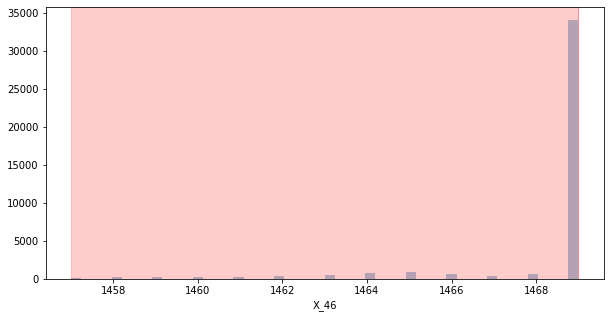

In [414]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_46, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_46.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_46.max(), alpha=0.2, color='red')

In [415]:
outlier_iqr(train_x,'X_49')

data_X49 = train_x[(train_x['X_49'] < upper) & (train_x['X_49'] > lower)]
len(data_X49)

IQR은 4466.25 이다.
lower bound 값은 6394.555 이다.
upper bound 값은 24259.555 이다.
총 이상치 개수는 2826 이다.


36781

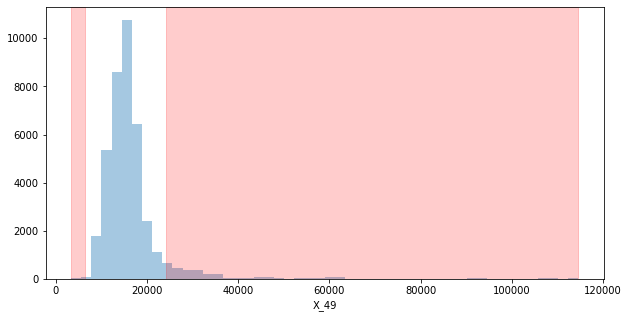

In [416]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_49, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_49.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_49.max(), alpha=0.2, color='red')

In [553]:
X_49 = data_X49['X_49']

In [417]:
outlier_iqr(train_x,'X_50')

data_X50 = train_x[(train_x['X_50'] < upper) & (train_x['X_50'] > lower)]
len(data_X50)

IQR은 7.59042749999999 이다.
lower bound 값은 115.56292975000002 이다.
upper bound 값은 145.92463974999998 이다.
총 이상치 개수는 464 이다.


39143

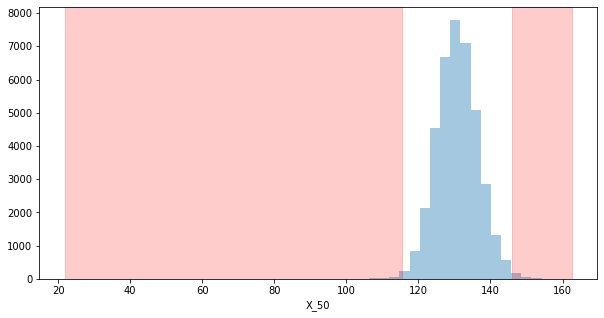

In [418]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_50, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_50.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_50.max(), alpha=0.2, color='red')

In [554]:
X_50 = data_X50['X_50']

In [419]:
outlier_iqr(train_x,'X_51')

data_X51 = train_x[(train_x['X_51'] < upper) & (train_x['X_51'] > lower)]
len(data_X51)

IQR은 7.501002999999997 이다.
lower bound 값은 116.4182535 이다.
upper bound 값은 146.42226549999998 이다.
총 이상치 개수는 487 이다.


39120

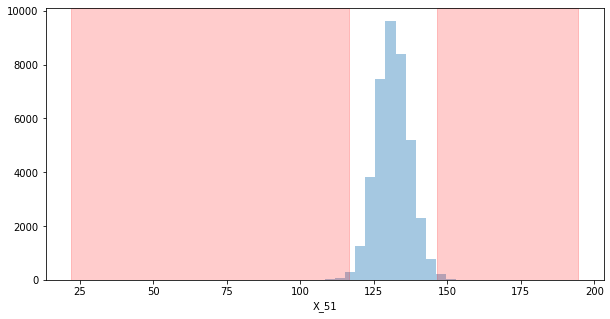

In [420]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_51, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_51.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_51.max(), alpha=0.2, color='red')

In [555]:
X_51 = data_X51['X_51']

In [421]:
outlier_iqr(train_x,'X_52')

data_X52 = train_x[(train_x['X_52'] < upper) & (train_x['X_52'] > lower)]
len(data_X52)

IQR은 8.227046999999999 이다.
lower bound 값은 122.13483000000001 이다.
upper bound 값은 155.04301800000002 이다.
총 이상치 개수는 442 이다.


39165

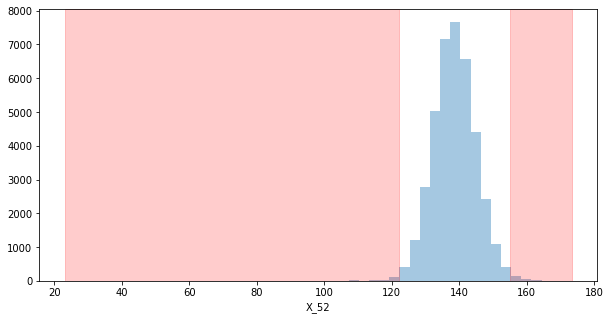

In [422]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_52, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_52.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_52.max(), alpha=0.2, color='red')

In [556]:
X_52 = data_X52['X_52']

In [423]:
outlier_iqr(train_x,'X_53')

data_X53 = train_x[(train_x['X_53'] < upper) & (train_x['X_53'] > lower)]
len(data_X53)

IQR은 7.244136999999995 이다.
lower bound 값은 113.50831950000001 이다.
upper bound 값은 142.4848675 이다.
총 이상치 개수는 423 이다.


39184

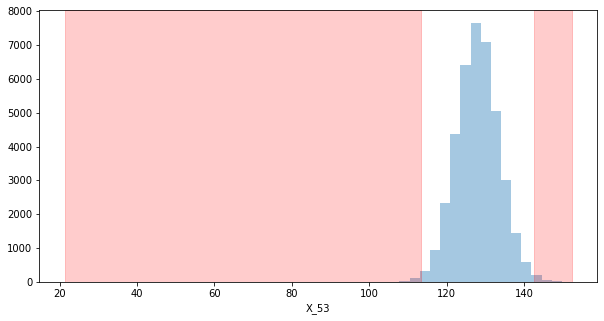

In [424]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_53, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_53.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_53.max(), alpha=0.2, color='red')

In [557]:
X_53 = data_X53['X_53']

In [425]:
outlier_iqr(train_x,'X_54')

data_X54 = train_x[(train_x['X_54'] < upper) & (train_x['X_54'] > lower)]
len(data_X54)

IQR은 6.789543500000008 이다.
lower bound 값은 114.51356424999999 이다.
upper bound 값은 141.67173825000003 이다.
총 이상치 개수는 411 이다.


39196

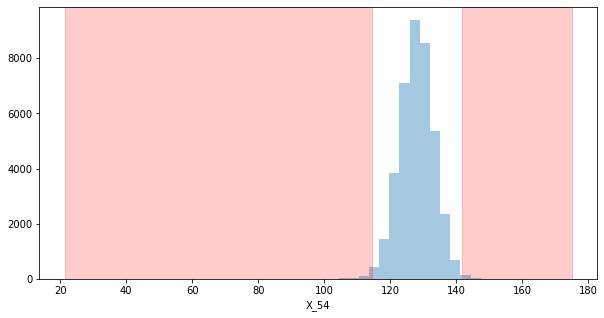

In [426]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_54, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_54.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_54.max(), alpha=0.2, color='red')

In [558]:
X_54 = data_X54['X_54']

In [427]:
outlier_iqr(train_x,'X_55')

data_X55 = train_x[(train_x['X_55'] < upper) & (train_x['X_55'] > lower)]
len(data_X55)

IQR은 8.328998500000012 이다.
lower bound 값은 121.25060524999998 이다.
upper bound 값은 154.56659925000002 이다.
총 이상치 개수는 384 이다.


39223

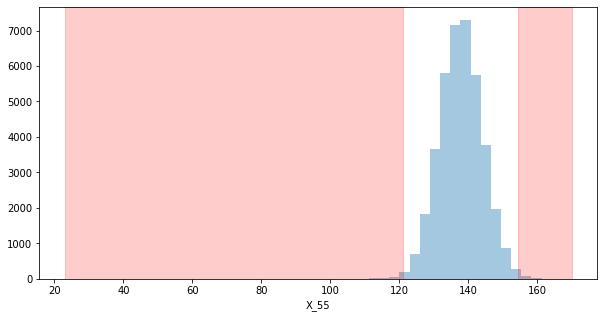

In [428]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_55, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_55.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_55.max(), alpha=0.2, color='red')

In [559]:
X_55 = data_X55['X_55']

In [429]:
outlier_iqr(train_x,'X_56')

data_X56 = train_x[(train_x['X_56'] < upper) & (train_x['X_56'] > lower)]
len(data_X56)

IQR은 6.705051499999996 이다.
lower bound 값은 115.07713525000001 이다.
upper bound 값은 141.89734125 이다.
총 이상치 개수는 433 이다.


39174

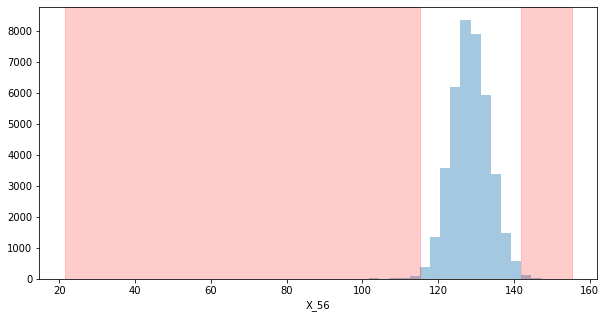

In [430]:
plt.figure(figsize=(10,5))

sns.distplot(train_x.X_56, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train_x.X_56.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train_x.X_56.max(), alpha=0.2, color='red')

In [560]:
X_56 = data_X56['X_56']

In [563]:
new_train_x = pd.concat([X_01, X_03, X_06, X_07, X_08, X_09, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19, X_20, X_21, X_22, X_24, X_25, X_26, X_27, X_28, X_29, X_30, X_31, X_32, X_33, X_34, X_35, X_36, X_37, X_38, X_39, X_40, X_41, X_42, X_43, X_44, X_45, X_49, X_50, X_51, X_52, X_53, X_54, X_55, X_56], axis = 1)

In [564]:
# IQR 기준 이상치 제거 후 데이터셋 
new_train_x

,X_01,X_03,X_06,X_07,X_08,X_09,X_12,X_13,X_14,X_15,...,X_44,X_45,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,67.47,74.983,29.45,NaN,245.71,4.34,0.18,13.34,13.37,...,21.09,0.29,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,65.17,72.943,28.73,NaN,233.61,4.38,0.18,13.33,13.33,...,21.13,0.13,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,64.07,72.943,28.81,105.77,272.20,4.36,0.15,13.36,13.36,...,21.12,0.14,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,67.57,NaN,28.92,115.21,255.36,4.33,NaN,13.30,13.33,...,21.09,0.22,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,63.57,70.904,29.68,103.38,241.46,4.35,0.16,13.35,13.34,...,21.10,0.22,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,62.27,66.825,30.20,77.83,298.05,4.36,0.15,13.37,13.38,...,21.19,0.11,NaN,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,62.77,66.825,29.21,102.25,270.67,4.40,0.13,13.36,13.36,...,21.19,0.12,NaN,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,64.67,68.864,29.96,102.61,198.07,4.38,0.14,13.38,13.39,...,21.19,0.13,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,63.67,67.845,30.30,112.60,275.52,4.33,0.16,13.36,13.38,...,21.13,0.11,NaN,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929
